# <span style="color:brown">STOCK CASE</span>

### You received a stock exchange time series data of stock from Nasdaq.Your client wants to build a machine learning model which can help him/her to decide whether or not to buy the stock in a day by using the data given.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import math
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

### Load the data

In [2]:
data = pd.read_csv('carvakCase.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31.12.2013,184.0700073,184.690002,183.929993,184.690002,162.482605,86119900
1,2.01.2014,183.9799957,184.070007,182.479996,182.919998,160.925400,119636900
2,3.01.2014,NaN,183.600006,182.630005,182.889999,160.898972,81390600
3,6.01.2014,183.4900055,183.559998,182.080002,182.360001,160.432693,108028200
4,7.01.2014,183.0899963,183.789993,182.949997,183.479996,161.418060,86144200


### Data cleaning and preparation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1593 non-null   object 
 1   Open       1581 non-null   object 
 2   High       1593 non-null   float64
 3   Low        1592 non-null   float64
 4   Close      1570 non-null   float64
 5   Adj Close  1592 non-null   float64
 6   Volume     1593 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 87.2+ KB


In [5]:
data.shape

(1593, 7)

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/1453708669.py:1: UserWarning: Parsing '31.12.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/1453708669.py:1: UserWarning: Parsing '13.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/1453708669.py:1: UserWarning: Parsing '14.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/1453708669.py:1: UserWarning: Parsing '15.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  

In [ ]:
#data.set_index('Date', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1593 non-null   datetime64[ns]
 1   Open       1581 non-null   object        
 2   High       1593 non-null   float64       
 3   Low        1592 non-null   float64       
 4   Close      1570 non-null   float64       
 5   Adj Close  1592 non-null   float64       
 6   Volume     1593 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
#data["Open"] = data["Open"].replace("a291.5299988", "291.5299988")

In [8]:
data["Open"] = data["Open"].str.replace("[a-zA-Z]", "", regex = True)

In [9]:
data['Open'] = data['Open'].astype('float')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1593 non-null   datetime64[ns]
 1   Open       1581 non-null   float64       
 2   High       1593 non-null   float64       
 3   Low        1592 non-null   float64       
 4   Close      1570 non-null   float64       
 5   Adj Close  1592 non-null   float64       
 6   Volume     1593 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.2 KB


In [ ]:
#print(data.isnull().sum())

In [ ]:
#data.dropna(inplace=True)

In [ ]:
#for column in data.columns:
   #data[column].fillna(data[column].mean(), inplace=True)

In [ ]:
#print(data.isnull().sum())

In [11]:
#Outlier
for column in data.columns:
    low_limit = data[column].quantile(0.25)
    high_limit = data[column].quantile(0.75)
    iqr = high_limit - low_limit
    lower_bound = low_limit - 1.5 * iqr
    upper_bound = high_limit + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data = data.drop(outliers.index)

In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1494.000000,1505.000000,1504.000000,1482.000000,1504.000000,1.505000e+03
mean,240.223474,241.417342,239.324315,240.980884,226.279571,8.992705e+07
std,39.868937,40.237155,39.869536,40.090194,45.445633,3.571034e+07
min,174.779999,175.559998,173.710007,175.169998,154.107284,2.027000e+07
25%,206.530003,207.389999,205.377502,206.602505,187.576088,6.271790e+07
50%,234.945000,235.850006,234.200005,236.050003,220.979134,8.218680e+07
75%,275.695007,277.089996,274.415001,275.877510,265.505692,1.092084e+08
max,337.790008,339.079987,337.480011,338.339996,334.888397,1.957729e+08


In [ ]:
#data = data.sort_values(by=['Date'], ascending=False)

In [ ]:
#print('Başlangıç Tarihi: ', data['Date'].min())
#print('Bitiş Tarihi: ', data['Date'].max())

In [ ]:
#graph = sns.pairplot(data[['Open', 'High', 'Low', 'Close']])
#plt.show()

### Exploratory Data Analysis

In [13]:
data.set_index('Date', inplace=True)

In [14]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.day_name()

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday Name
Date,,,,,,,,,
2013-12-31,184.070007,184.690002,183.929993,184.690002,162.482605,86119900,2013,12,Tuesday
2014-02-01,183.979996,184.070007,182.479996,182.919998,160.925400,119636900,2014,2,Saturday
2014-03-01,NaN,183.600006,182.630005,182.889999,160.898972,81390600,2014,3,Saturday
2014-06-01,183.490005,183.559998,182.080002,182.360001,160.432693,108028200,2014,6,Sunday
2014-07-01,183.089996,183.789993,182.949997,183.479996,161.418060,86144200,2014,7,Tuesday


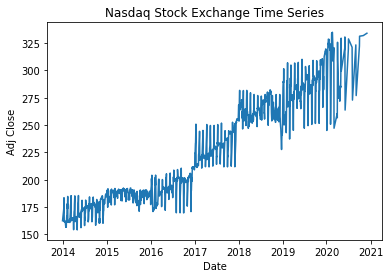

In [16]:
sns.lineplot(x='Date', y='Adj Close', data=data)
plt.title('Nasdaq Stock Exchange Time Series')
plt.show()

<AxesSubplot:>

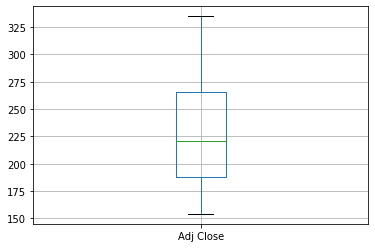

In [17]:
data.boxplot(column=['Adj Close']) #train data

<Figure size 1440x720 with 0 Axes>

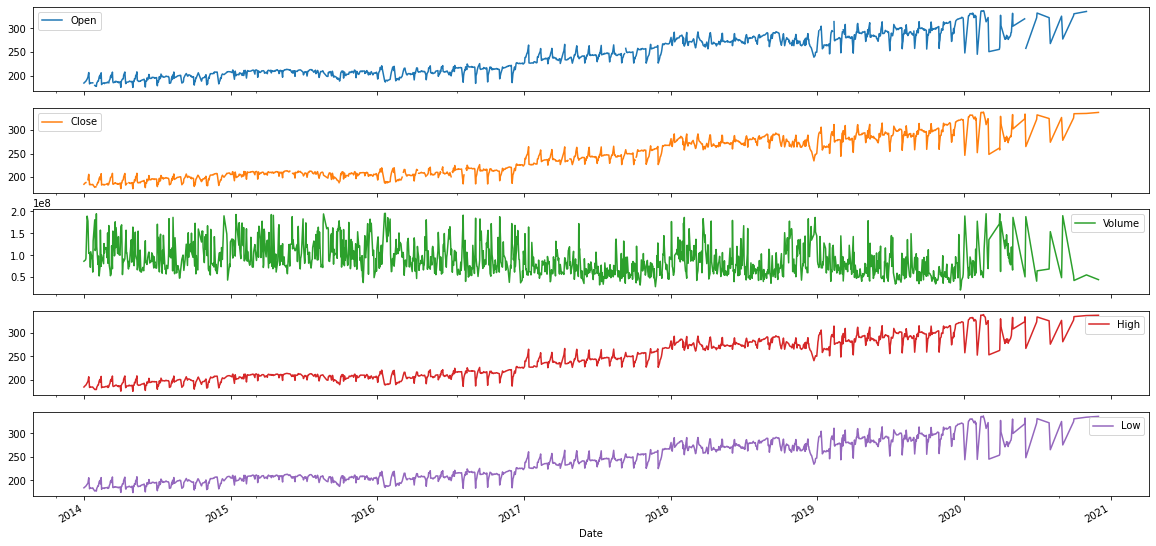

In [18]:
plt.figure(figsize=(20, 10))
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = data[cols].plot(figsize=(20, 10), subplots = True)
plt.show()

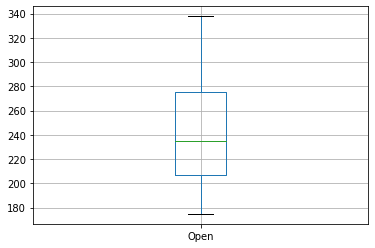

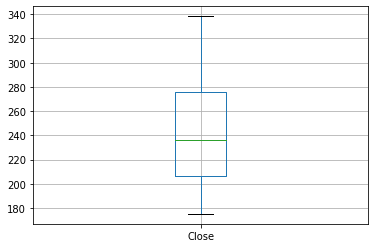

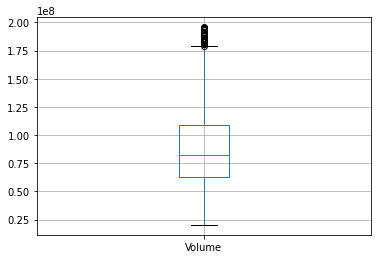

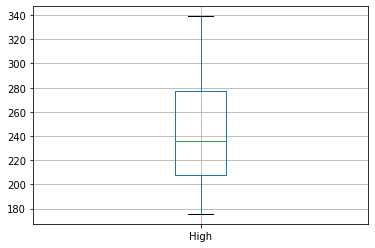

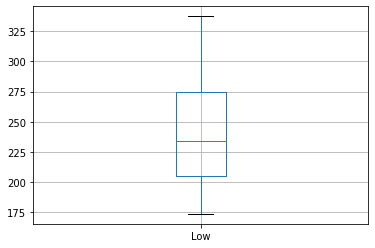

In [19]:
cols = ['Open', 'Close', 'Volume', 'High', 'Low']

for i in cols:
     plt.subplots()
     axes = data.boxplot(column= [i])
plt.show()

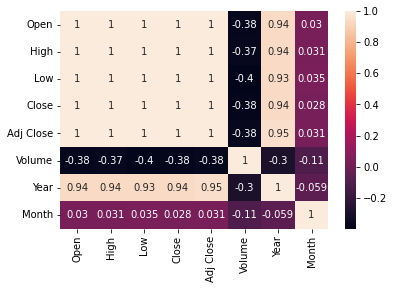

In [20]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

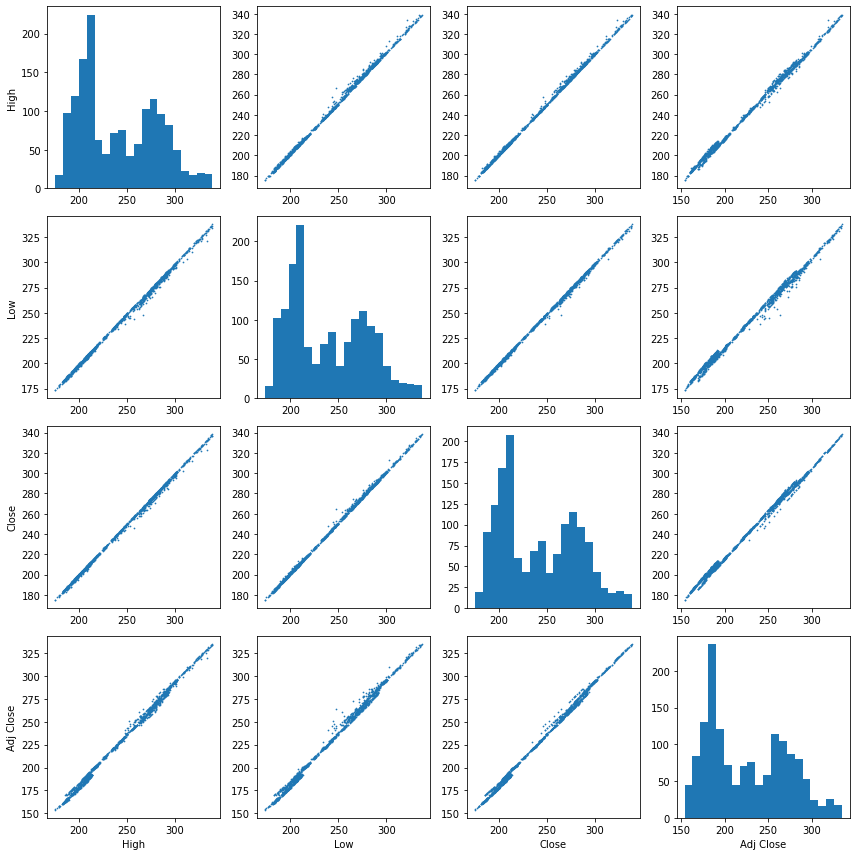

In [21]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(data.iloc[:, i+1], bins=20)
        else:
            axs[i, j].scatter(data.iloc[:, j+1], data.iloc[:, i+1], s=0.5)
        if j == 0:
            axs[i, j].set_ylabel(data.columns[i+1])
        if i == 3:
            axs[i, j].set_xlabel(data.columns[j+1])
            
plt.tight_layout()
plt.show()

In [ ]:
#data.dropna(inplace=True)  

In [ ]:
#for column in data.columns:
   #data[column].fillna(data[column].mean(), inplace=True)

### Feature Engineering

In [22]:
data['HL_PCT'] = (data['High'] - data['Low']) / data['Low'] * 100.0  # high-low percentage
data['PCT_change'] = (data['Close'] - data['Open']) / data['Open'] * 100.0  # open-close percentage

In [23]:
print(data.isnull().sum())

Open            11
High             0
Low              1
Close           23
Adj Close        1
Volume           0
Year             0
Month            0
Weekday Name     0
HL_PCT           1
PCT_change      34
dtype: int64


In [24]:
data.dropna(inplace=True)

In [25]:
cols = ['Open', 'Close', 'Volume', 'High', 'Low', 'Adj Close', 'HL_PCT', 'PCT_change']

for column in cols:
   data[column].fillna(data[column].mean(), inplace=True)

In [26]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday Name,HL_PCT,PCT_change
Date,,,,,,,,,,,
2013-12-31,184.070007,184.690002,183.929993,184.690002,162.482605,86119900,2013,12,Tuesday,0.413206,0.336826
2014-02-01,183.979996,184.070007,182.479996,182.919998,160.925400,119636900,2014,2,Saturday,0.871335,-0.576148
2014-06-01,183.490005,183.559998,182.080002,182.360001,160.432693,108028200,2014,6,Sunday,0.812827,-0.615840
2014-07-01,183.089996,183.789993,182.949997,183.479996,161.418060,86144200,2014,7,Tuesday,0.459140,0.213010
2014-08-01,183.449997,183.830002,182.889999,183.520004,161.453278,96582300,2014,8,Friday,0.513971,0.038162


In [27]:
data.shape

(1469, 11)

In [28]:
df = data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

In [29]:
forecast_out = int(math.ceil(0.10 * len(df))) 
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

147


/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/790360798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [ ]:
#forecast_out = int(math.ceil(0.10 * len(df)))
#print(forecast_out)
#df = df.copy()
#df_copy.loc['label'] = df_copy['Adj Close'].shift(-forecast_out)
#df.loc['label'] = df['Adj Close'].shift(-forecast_out)

In [30]:
df.head()

,HL_PCT,PCT_change,Adj Close,Volume,label
Date,,,,,
2013-12-31,0.413206,0.336826,162.482605,86119900,176.616165
2014-02-01,0.871335,-0.576148,160.925400,119636900,177.131165
2014-06-01,0.812827,-0.615840,160.432693,108028200,176.855896
2014-07-01,0.459140,0.213010,161.418060,86144200,177.752624
2014-08-01,0.513971,0.038162,161.453278,96582300,177.868042


In [ ]:
#fs_data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
# Difference between opening and closing price

#fs_data['Price Change'] = fs_data['Close'] - fs_data['Open'] 

In [ ]:
#print(fs_data)

In [ ]:
# Difference between current and previous day's volume

#fs_data['Volume Change'] = fs_data['Volume'].diff()

In [ ]:
# Calculate the daily return of the stock price

#fs_data['Daily Return'] = fs_data['Close'].pct_change()

In [ ]:
#fs_data['price_difference'] = fs_data['Close'] - fs_data['Open']
#fs_data['volume_difference'] = fs_data['Volume'].diff()
#fs_data = fs_data.drop(['Date', 'Adj Close'], axis=1)

### Machine Learning

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import datetime


In [32]:
scaler = StandardScaler()

In [33]:
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/3654747103.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [34]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [35]:
X.shape

(1322, 4)

In [36]:
df.dropna(inplace=True)

/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [37]:
y = np.array(df['label'])
y.shape

(1322,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
lr_confidence

0.9090833489850079

In [40]:
#random forest

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)
rf_confidence

0.9382602555825011

In [41]:
#Ridge
rg = Ridge()
rg.fit(X_train, y_train)
rg_confidence = rg.score(X_test, y_test)
rg_confidence

0.9091013566481543

In [42]:
#SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_confidence = svr.score(X_test, y_test)
svr_confidence

0.8383245911751436

In [43]:
names = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.909083
1,Random Forest,0.938260
2,Ridge,0.909101
3,SVR,0.838325


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'SVR')])

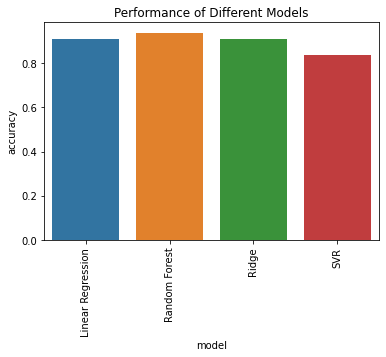

In [44]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy' )
plt.title('Performance of Different Models')
plt.xticks(rotation='vertical')

In [45]:
last_date = df.index[-1] 
last_unix = last_date.timestamp() 
one_day = 86400 #one day seconds
next_unix = last_unix + one_day 

In [46]:
forecast_set = rf.predict(X_Predictions) 
df.loc[:, 'Forecast'] = np.nan

/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/369316898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Forecast'] = np.nan


In [47]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/869091167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/869091167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_50276/869091167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

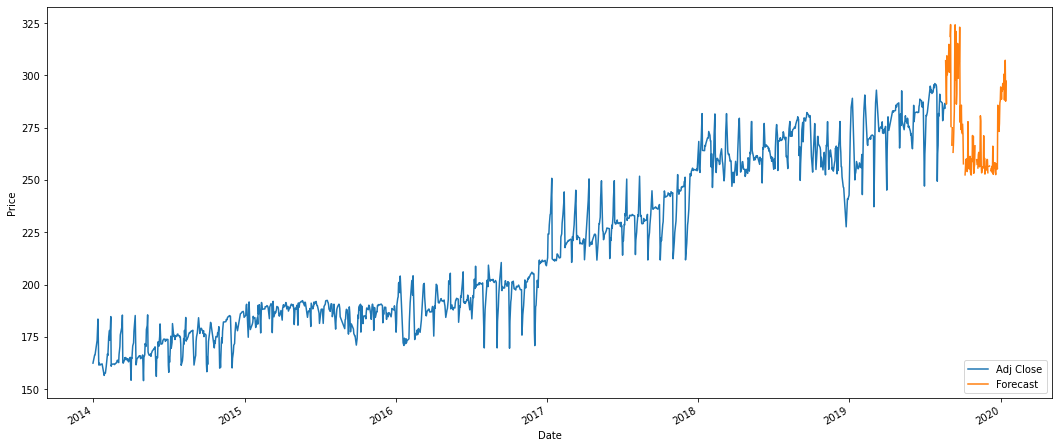

In [48]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='Date'>

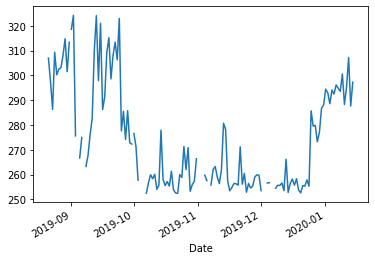

In [49]:
df['Forecast'].plot()

In [73]:
print(forecast_set)

[307.0277243  297.55169342 286.29080569 309.36240265 300.25398894
 302.61577271 303.08398009 308.08804474 314.83337708 301.52261079
 313.4452063  318.64081422 324.2896405  275.57839706 256.45091766
 266.65374314 274.98698517 313.78599335 263.23607407 267.70337188
 276.08138932 282.69725646 309.95836762 324.17603425 297.93283599
 321.07371796 286.25052917 291.2800229  309.25109405 315.26125335
 298.5888974  308.07797668 313.46726348 306.31052185 323.06119597
 277.61055222 285.54026276 274.14058396 285.79604797 272.8015239
 272.29082489 276.53713593 271.32256807 257.73001298 273.47077929
 260.15797198 256.50372499 252.45672898 256.72834277 259.91787188
 258.26787738 260.07971926 254.02387544 255.66067034 277.88743944
 257.94557756 255.501859   257.1449425  255.32119708 261.32000399
 253.8423868  252.51773652 252.38151919 259.95301746 258.79231539
 271.28037524 262.02300296 270.84435473 253.21199448 255.8681598
 257.29690508 266.34953112 260.40245532 274.25373797 254.34836657
 259.7356067

In [55]:
forecast_df = pd.DataFrame({'Date': next_date, 'Close': forecast_set})
forecast_df.set_index('Date', inplace=True)

In [63]:
print(forecast_df)

                          Close
Date                           
2020-01-14 03:00:00  307.027724
2020-01-14 03:00:00  297.551693
2020-01-14 03:00:00  286.290806
2020-01-14 03:00:00  309.362403
2020-01-14 03:00:00  300.253989
...                         ...
2020-01-14 03:00:00  288.257012
2020-01-14 03:00:00  295.250685
2020-01-14 03:00:00  307.231084
2020-01-14 03:00:00  287.671158
2020-01-14 03:00:00  297.279677

[147 rows x 1 columns]


In [66]:
merged_df = data.merge(forecast_df, how='outer', left_index=True, right_index=True)


In [61]:
print(merged_df)

                  Open        High         Low     Close_x   Adj Close  \
Date                                                                     
2013-12-31  184.070007  184.690002  183.929993  184.690002  162.482605   
2014-01-04  187.619995  188.360001  187.000000  188.250000  166.345413   
2014-01-05  188.220001  188.839996  187.729996  188.330002  166.416153   
2014-01-10  196.699997  196.770004  193.910004  194.350006  173.365143   
2014-01-12  206.399994  206.539993  205.380005  205.759995  183.543182   
...                ...         ...         ...         ...         ...   
2020-09-01  326.160004  326.730011  325.519989  326.649994  323.317627   
2020-09-04  277.579987  281.200012  275.470001  278.200012  276.981140   
2020-10-01  327.290008  327.459992  325.200012  325.709992  322.387207   
2020-10-02  331.230011  334.750000  331.190002  334.679993  331.265717   
2020-11-02  336.160004  337.019989  334.679993  335.260010  331.839813   

                 Volume    Year  Mont

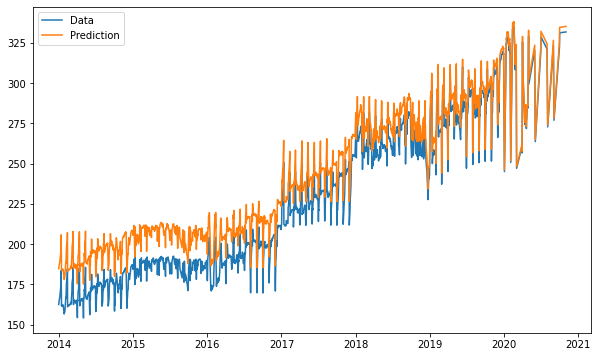

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(merged_df.index, merged_df['Adj Close'], label='Data')
ax.plot(merged_df.index, merged_df['Close_x'], label='Prediction')
ax.legend()
plt.show()

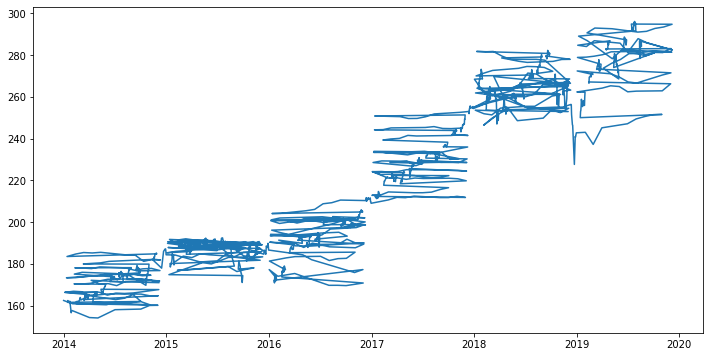

In [75]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df['Adj Close'], label='Ham Veri')